In [1]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '0'
import torch
import matplotlib.pyplot as plt
import numpy as np
import cv2
import random
from model.v1 import Model
from train import NumpyDataset
import pickle
import zlib
from torch.utils.data import Dataset
import cv2

seed = 0
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
np.random.seed(seed)
random.seed(seed)


model = Model().cuda()
ckpt = torch.load('./ckpt/best.pth')
model.load_state_dict(ckpt)
model.eval()
print('model loaded')

model loaded


In [2]:
valset = NumpyDataset('/data/gzy/anime/anime_val.pkl')

In [3]:
idx = 100

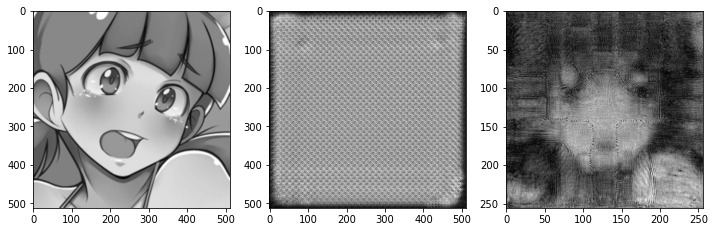

In [29]:
input, label = valset[idx]
idx = idx + 1
input = torch.tensor(input).cuda()
label = torch.tensor(label).cuda()

phase, reconstruction = model(input)

plt.figure(figsize=(12,4))
ax1 = plt.subplot(131)
plt.imshow(input[0, 0].detach().cpu().numpy(), 'gray')
ax2 = plt.subplot(132)
plt.imshow(phase[0, 0].detach().cpu().numpy(), 'gray')
ax3 = plt.subplot(133)
plt.imshow(reconstruction[0, 0, (256-128):(256+128), (256-128):(256+128)].detach().cpu().numpy(), 'gray')
plt.show()